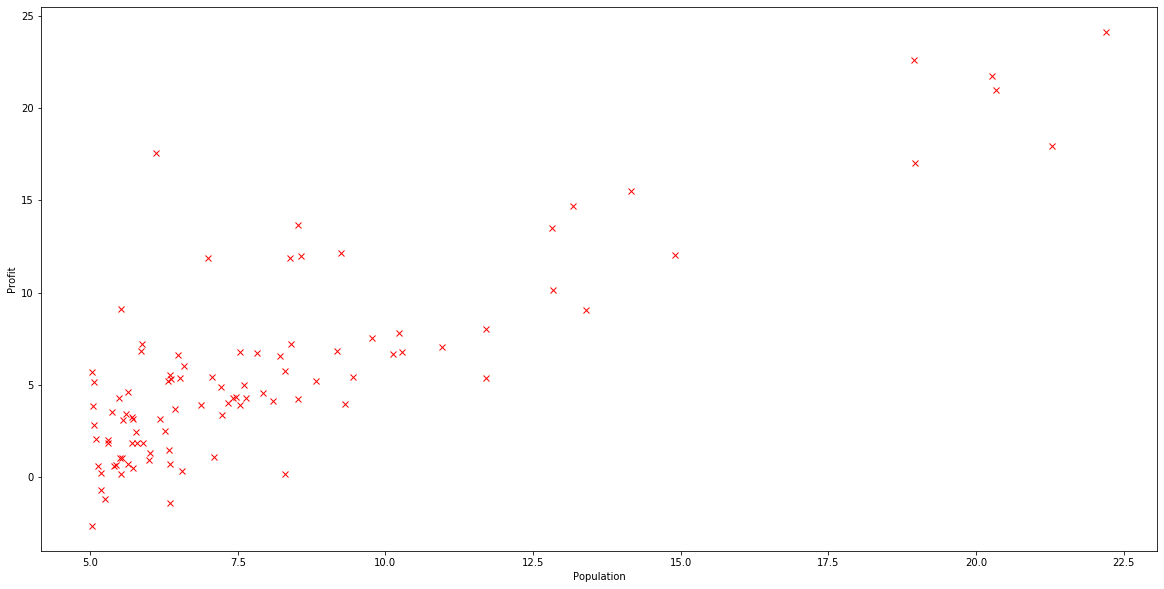

With theta = [0 ; 0]
Cost computed = [32.07273388]


Expected cost value (approx) 32.07


With theta = [-1 ; 2]
Cost computed =  [54.24245508]


Expected cost value (approx) 54.24

Theta found by gradient descent:

[[-3.70935307]
 [ 1.17430495]]
Expected theta values (approx)

 -3.6303
  1.1664




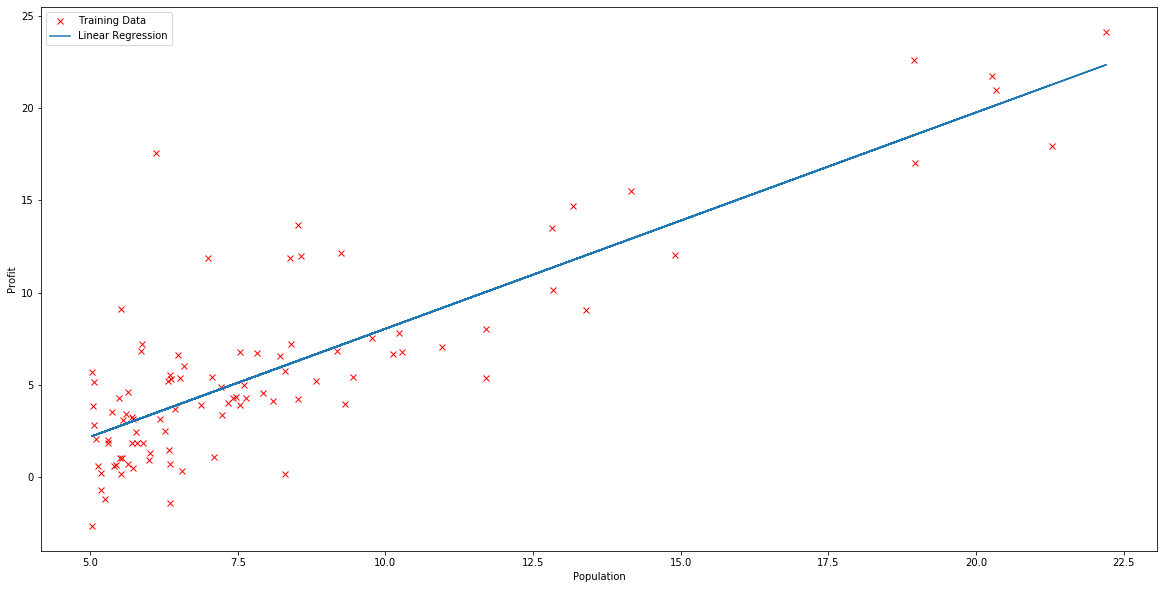

For population = 35,000, we predict a profit of  [4007.14253505]


For population = 70,000, we predict a profit of  [45107.81572277]




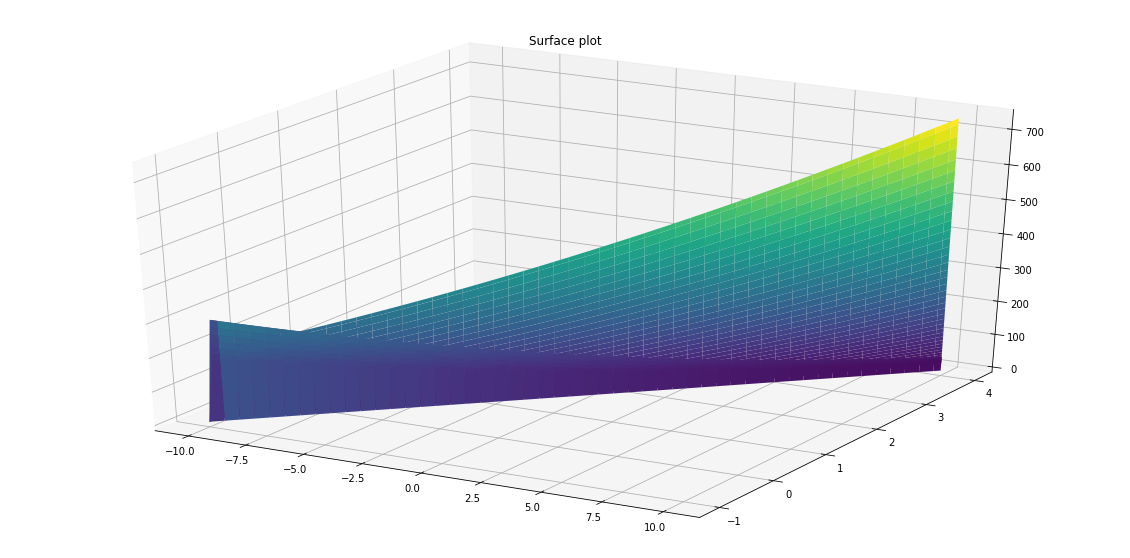

<Figure size 1440x720 with 0 Axes>

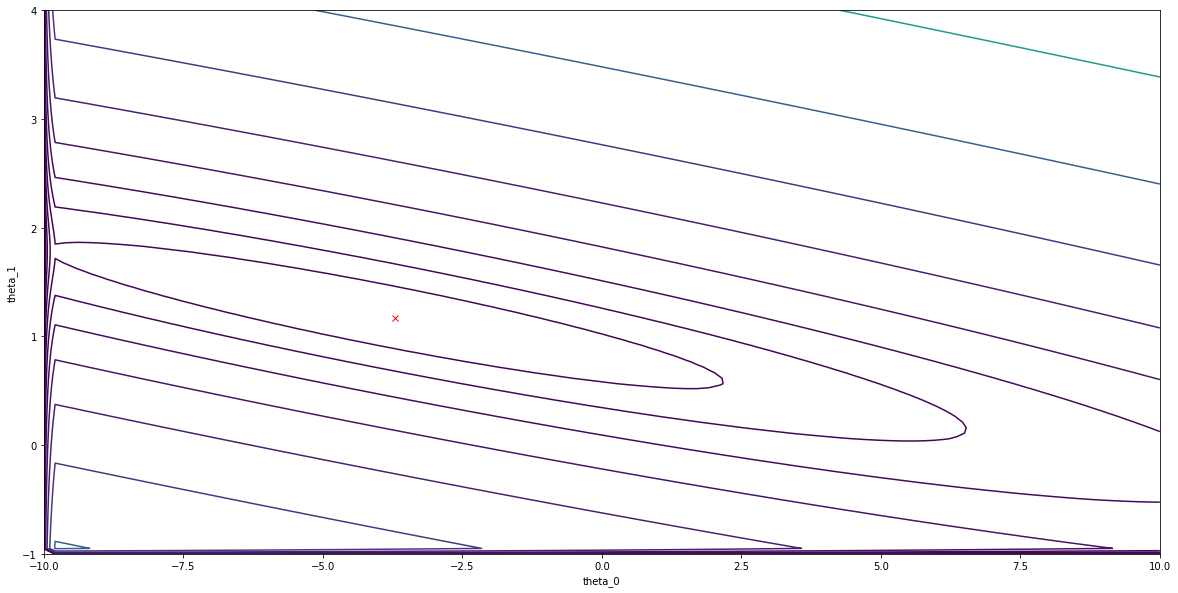

In [1]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

data = np.loadtxt("ex1data1.txt", delimiter=',')
X = data[:, 0]
y = data[:, 1].reshape(-1,1)
m = y.shape[0]

plt.plot(X, y, 'rx')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

X = np.vstack((np.ones(m),data[:,0])).T
theta = np.zeros((2,1))

iterations = 1500
alpha = 0.01

J=(((np.dot(X,theta)-y)**2)/(2*m)).sum(axis=0)
print('With theta = [0 ; 0]\nCost computed =', J)
print('\n')
print('Expected cost value (approx) 32.07\n')

theta=np.array([-1, 2]).reshape(-1,1)
J=(((np.dot(X,theta)-y)**2)/(2*m)).sum(axis=0)
print('\nWith theta = [-1 ; 2]\nCost computed = ', J)
print('\n')
print('Expected cost value (approx) 54.24\n')  
             
J_history = np.zeros(iterations)
for iter in range(1,iterations):
    theta=theta-alpha*np.dot(X.T,(np.dot(X,theta)-y))/m
    J_history[iter]=(((np.dot(X,theta)-y)**2)/(2*m)).sum(axis=0)
print('Theta found by gradient descent:\n')
print(theta);
print('
Expected theta values (approx)\n')
print(' -3.6303\n  1.1664\n\n')
                        
plt.figure()
plt.plot(data[:, 0], y, 'rx')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.plot(X[:,1], np.dot(X,theta), '-')
plt.legend(["Training Data","Linear Regression"])
plt.show()

a1=np.array([1, 3.5])
predict1 = np.dot(a1,theta);
print('For population = 35,000, we predict a profit of ',predict1*10000)
print('\n')
a2=np.array([1, 7])
predict2 = np.dot(a2,theta);
print('For population = 70,000, we predict a profit of ',predict2*10000)
print('\n')
                        
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]));
for i in range(1,theta0_vals.shape[0]):
    for j in range(1,theta1_vals.shape[0]):
      t=np.vstack((theta0_vals[i], theta1_vals[j]))
      J_vals[i,j] =(((np.dot(X,t)-y)**2)/(2*m)).sum(axis=0)

J_vals = J_vals.conj().transpose()
           
fig = plt.figure()
ax = plt.axes(projection='3d')
           
plt.figure()
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

plt.figure()
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, num=20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx')
plt.show()

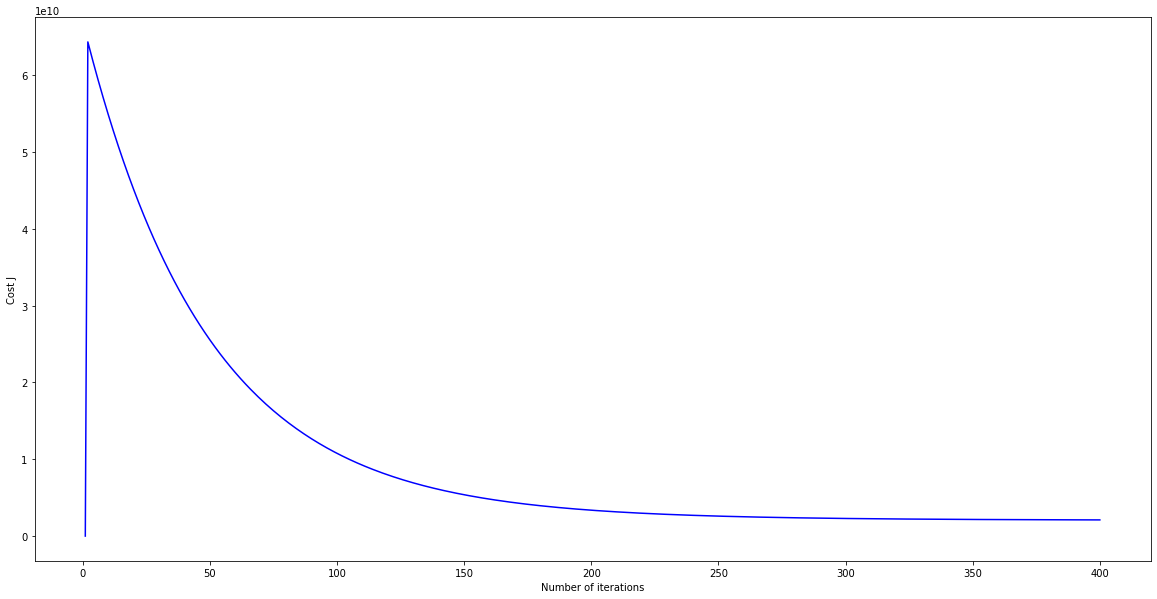

Theta computed from gradient descent: 

[[334240.34080559]
 [ 99365.99989389]
 [  3309.43600826]]


Predicted price of a 1650 sq-ft, 3 br house using gradient descent:
 $ [[289170.50509571]]

Theta computed from the normal equations: 

[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


Predicted price of a 1650 sq-ft, 3 br house using normal equations:
 $ [[293081.46433489]]


In [8]:
data = np.loadtxt("ex1data2.txt", delimiter=',')
X = data[:, 0:2]
y = data[:, 2].reshape(-1,1)
m = y.shape[0]

mu = np.zeros((1, X.shape[1]))
sigma = np.zeros((1, X.shape[1]))
mu=np.mean(X, axis=0).reshape(-1,1)
sigma=np.std(X, axis=0).reshape(-1,1)
X=(X-mu.T)/sigma.T

X = np.concatenate((np.ones((m,1)),X),axis=1)

alpha = 0.01;
num_iters = 400;

theta = np.zeros((3, 1));
J_history = np.zeros((num_iters, 1));

for iter in range(1,num_iters):
    theta=theta-alpha*np.dot(X.T,(np.dot(X,theta)-y))/m
    J_history[iter] =(((np.dot(X,theta)-y)**2)/(2*m)).sum(axis=0)

plt.figure()
plt.plot(np.array(range(1,401)), J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

print('Theta computed from gradient descent: \n')
print(theta)
print('\n')

price = 0
features=np.array([1, 1650, 3], float).reshape(-1,1)
features[1:]=(features[1:]-mu)/sigma
features=features.T
price=np.dot(features,theta)
print('Predicted price of a 1650 sq-ft, 3 br house using gradient descent:\n $', price)

X = data[:, 0:2]
X = np.concatenate((np.ones((m,1)),X),axis=1)
theta = np.zeros((X.shape[1], 1))
theta=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print('\nTheta computed from the normal equations: \n')
print(theta)
print('\n')

price =0
features=np.array([1, 1650, 3]).reshape(-1,1)
features=features.T
price=np.dot(features,theta)
print('Predicted price of a 1650 sq-ft, 3 br house using normal equations:\n $', price)